<AxesSubplot:>

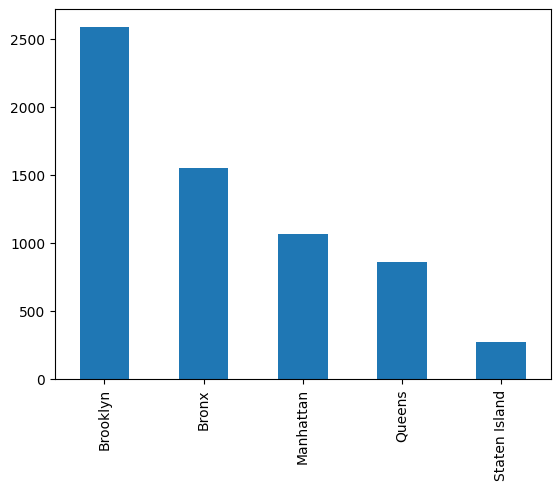

In [257]:
import pandas as pd
import numpy as np

df = pd.read_csv('Affordable_Housing_Production_by_Building.csv')
df["Borough"].value_counts().head(100).plot(kind="bar")

In [101]:
df['Building Completion Date'].dtype

dtype('O')

Task 1

         Project ID   Building ID      Postcode           BBL           BIN  \
count   6335.000000  5.028000e+03   4974.000000  4.902000e+03  4.902000e+03   
mean   63170.278769  5.535413e+05  10788.206072  2.455200e+09  2.573305e+06   
std     7417.924857  3.960316e+05    515.201932  9.557723e+08  1.027567e+06   
min    44218.000000  3.750000e+02  10001.000000  0.000000e+00  1.000000e+06   
25%    58219.000000  1.150322e+05  10453.000000  2.025348e+09  2.002748e+06   
50%    65348.000000  6.431430e+05  11205.000000  3.011370e+09  3.000000e+06   
75%    69183.000000  9.708035e+05  11222.000000  3.036158e+09  3.338127e+06   
max    73337.000000  1.007125e+06  11694.000000  5.031570e+09  5.170228e+06   

       Council District     Latitude    Longitude  Latitude (Internal)  \
count       6326.000000  4974.000000  4974.000000          4895.000000   
mean          26.164717    40.743094   -73.919242            40.743726   
std           14.125896     0.079897     0.052645             0.07

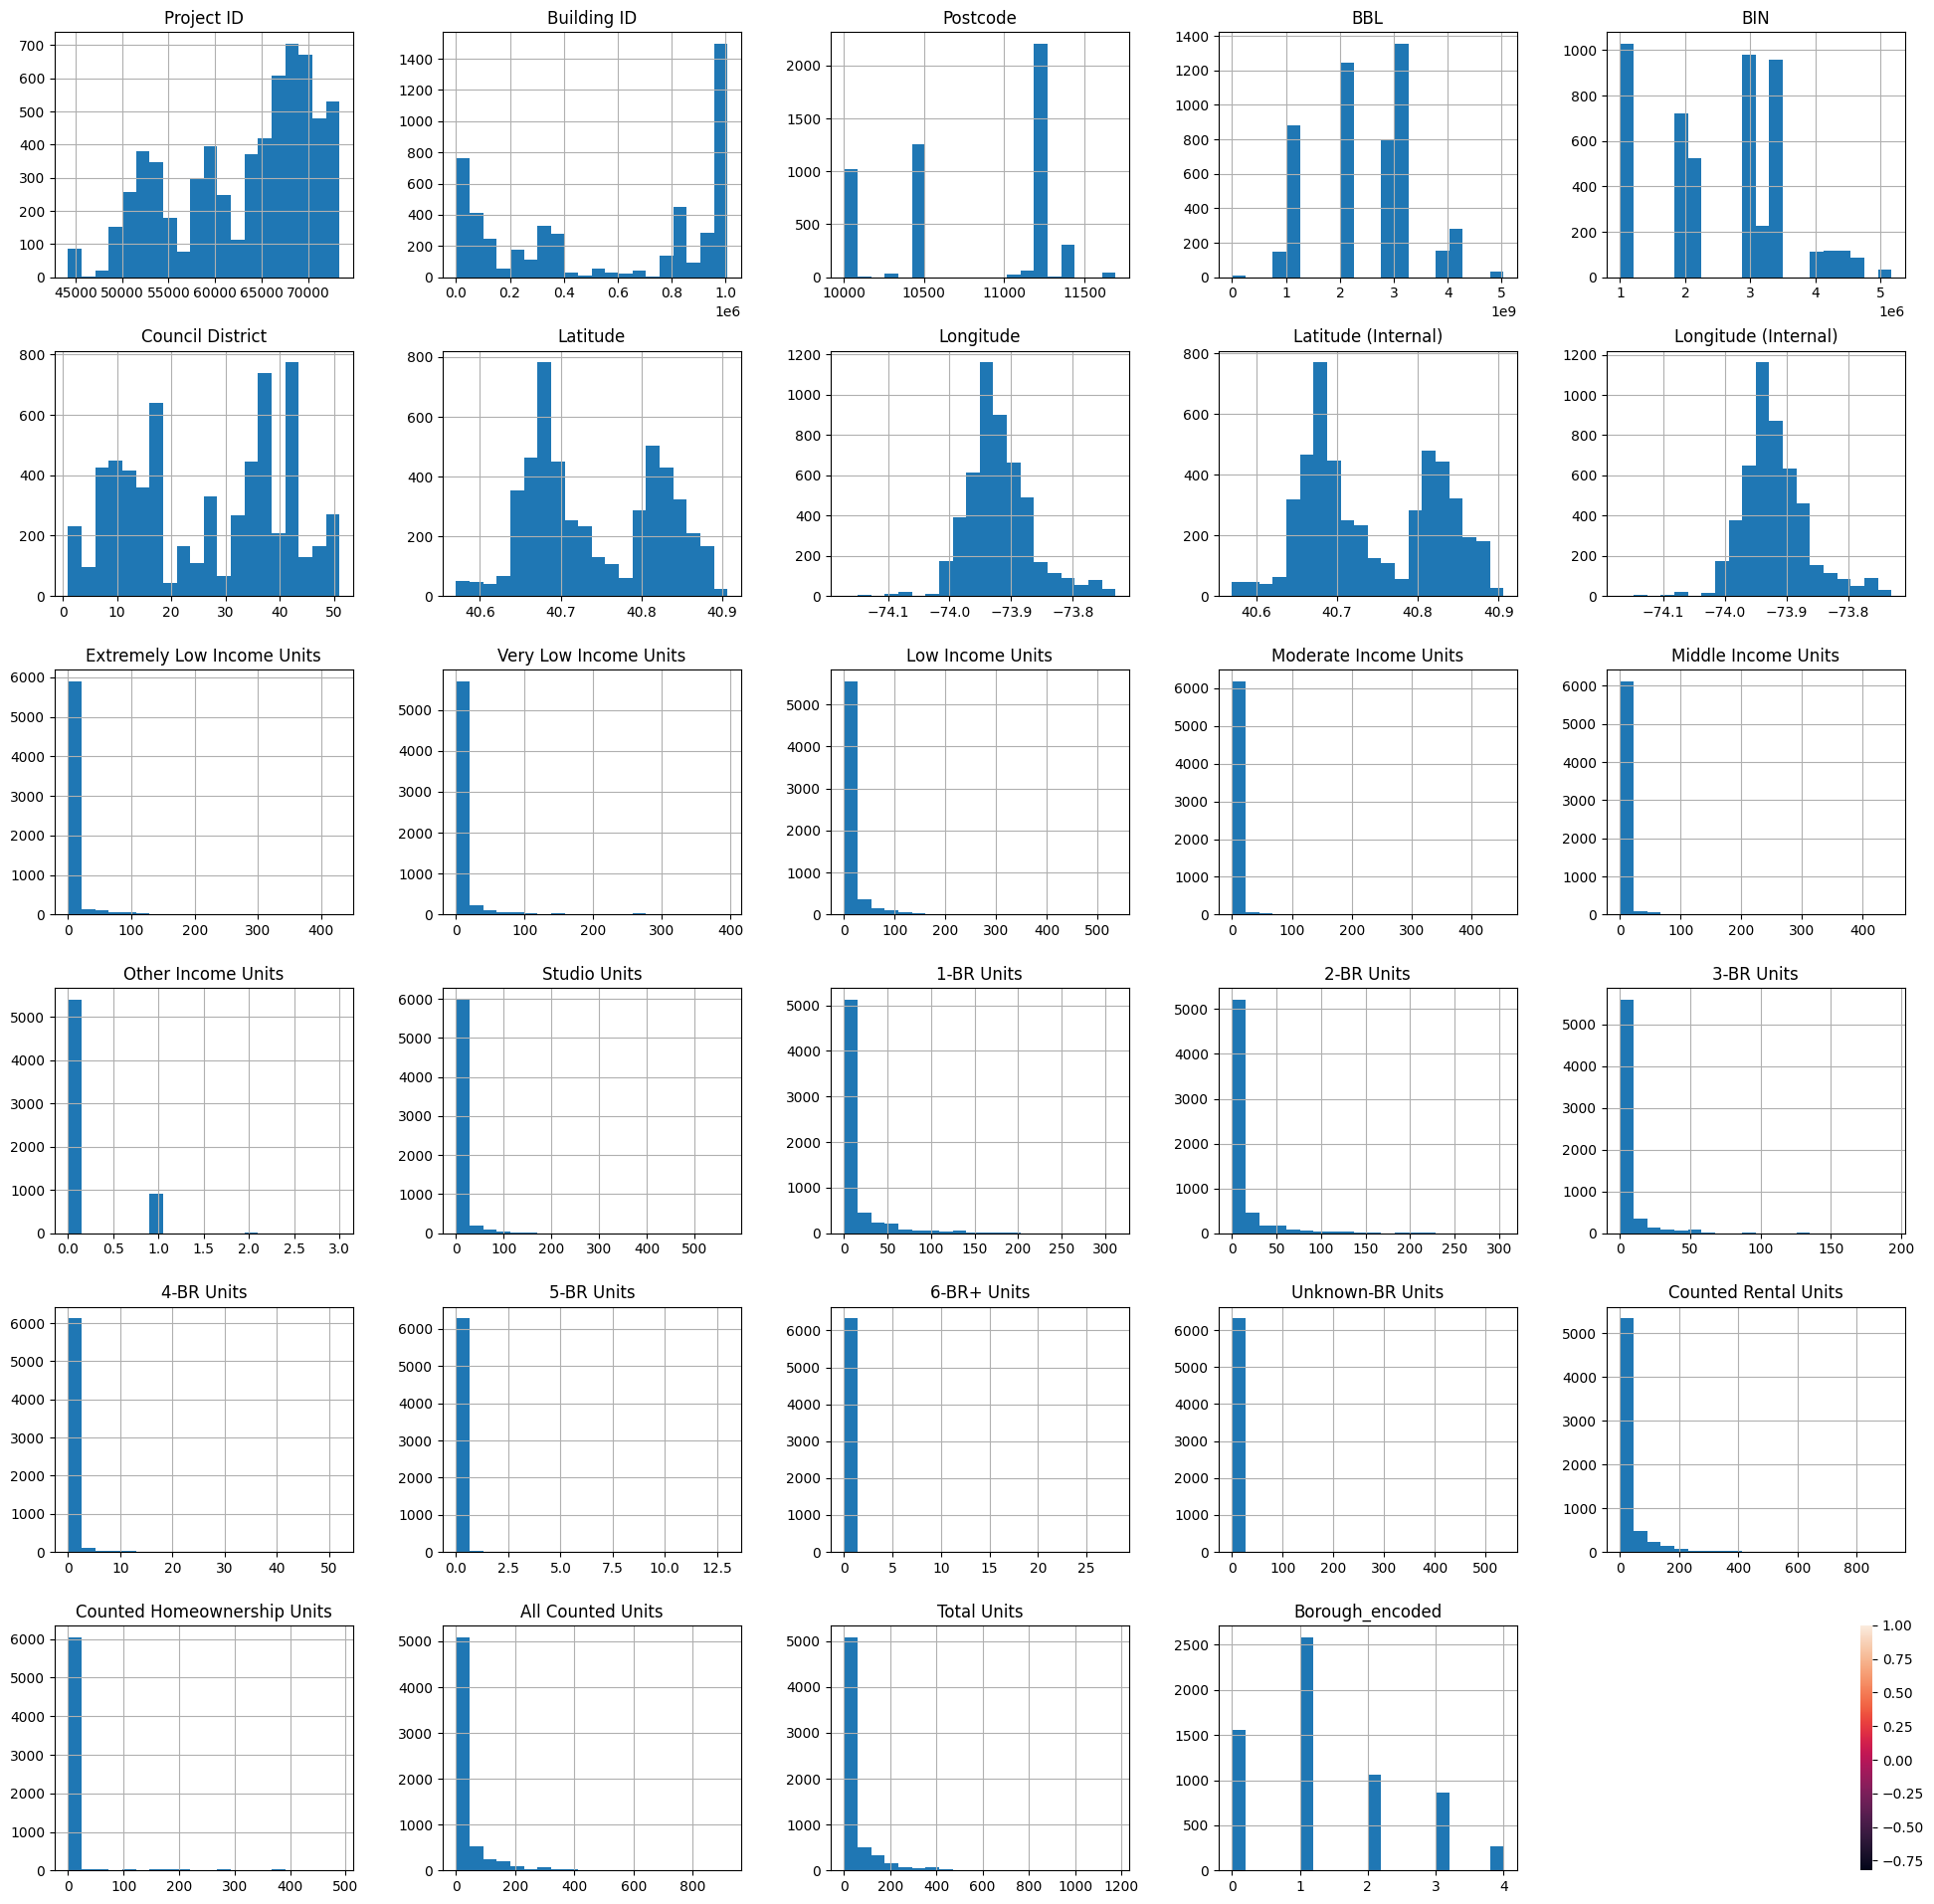

In [176]:
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

# Load the dataset
data = pd.read_csv('Affordable_Housing_Production_by_Building.csv')
le = LabelEncoder()
data['Borough_encoded'] = le.fit_transform(data['Borough'])

#data['Project_Name_encoded'] = le.fit_transform(data['Project Name'])

# Summary statistics of numerical features
print(data.describe())

# Distribution of each numerical feature
data.hist(bins=20, figsize=(24,24))

# Correlation matrix of numerical features
corr_matrix = data.corr()
sns.heatmap(corr_matrix, annot=True)

# Missing data analysis
print(data.isna().sum())

# Value counts of categorical features
for column in data.select_dtypes(include=[np.object_]):
   print(data[column].value_counts())

# Order features based on correlation with target variable
target_correlation = corr_matrix['Borough_encoded']
ordered_features = target_correlation.abs().sort_values(ascending=False).index
print(ordered_features)

                                    Project Name  Project Start Date  \
Project Name                            1.000000            0.590410   
Project Start Date                      0.590410            1.000000   
Project Completion Date                 0.514262            0.694507   
Number                                  0.430128            0.000000   
Street                                  0.587820            0.188987   
Borough                                 0.549152            0.546875   
Community Board                         0.540092            0.477558   
Census Tract                            0.555974            0.411543   
NTA - Neighborhood Tabulation Area      0.630030            0.472628   
Building Completion Date                0.408292            0.629963   
Reporting Construction Type             0.656182            0.657581   
Extended Affordability Only             0.795535            0.707318   
Prevailing Wage Status                  0.784143            0.37

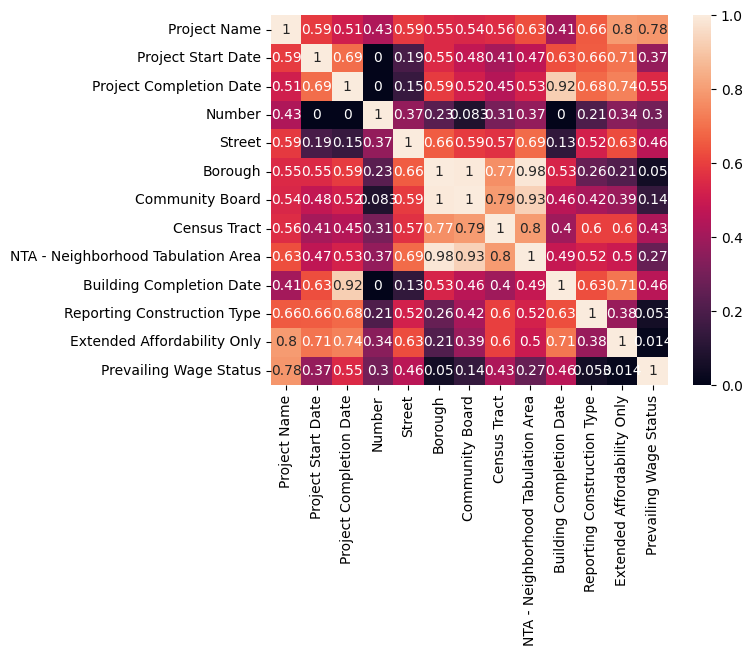

In [337]:
import pandas as pd
import numpy as np

# Load the dataset
data = pd.read_csv('Affordable_Housing_Production_by_Building.csv')

from scipy.stats import chi2_contingency

# Define a function to calculate Cramér's V statistic
def cramers_v(x, y):
    confusion_matrix = pd.crosstab(x, y)
    chi2 = chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2 / n
    r, k = confusion_matrix.shape
    phi2corr = max(0, phi2 - ((k-1)*(r-1))/(n-1))
    rcorr = r - ((r-1)**2)/(n-1)
    kcorr = k - ((k-1)**2)/(n-1)
    return np.sqrt(phi2corr / min((kcorr-1), (rcorr-1)))

# Select the categorical features
cat_features = data.select_dtypes(include=['object'])

# Calculate the correlation matrix using Cramér's V
corr_matrix = pd.DataFrame(np.zeros((len(cat_features.columns), len(cat_features.columns))), 
                            index=cat_features.columns, columns=cat_features.columns)
for i in range(len(cat_features.columns)):
    for j in range(len(cat_features.columns)):
        if i == j:
            corr_matrix.iloc[i, j] = 1
        else:
            corr_matrix.iloc[i, j] = cramers_v(cat_features.iloc[:, i], cat_features.iloc[:, j])

# Display the correlation matrix
print(corr_matrix)
sns.heatmap(corr_matrix, annot=True)
target_correlation = corr_matrix['Borough']



    Task 2 (Method 1 functions) && Task 3 (Method 1 Accuracy)

This code builds an ensemble model using Random Forest and Gradient Boosting classifiers to predict the borough of a given affordable housing production project, based on its features. Here is a detailed explanation of the code:


1.  The required libraries are imported, including pandas, numpy, scikit-learn, imbalanced-learn, and VotingClassifier from sklearn.ensemble.


2.  The dataset is loaded into a Pandas dataframe `'(df)' `using the pd.read_csv() function.


3.  A LabelEncoder is instantiated to encode the categorical feature 'NTA - Neighborhood Tabulation Area' as a numerical feature 'NTA'.


4.  The dataframe is split into input (X) and target (y) variables. The input variables include the 'NTA', '1-BR Units', 'Middle Income Units', 'Studio Units', and `'Total Units' columns. The target variable is 'Borough'`.


5.  `'RandomOverSampler'` is instantiated with the sampling_strategy='minority' parameter to 'oversample the minority class (borough) in the target variable.'


6.  The X and y variables are `'resampled using the oversample object'` created in step 5.


7.  The resampled dataset is split into training and testing sets with the train_test_split() function from scikit-learn. The testing set is 2.7% of the resampled data, and the random_state is set to 9999999.


8.  Two individual models, a `'Random Forest Classifier and a Gradient Boosting Classifier,' `are instantiated.


9.  A 'VotingClassifier is instantiated', using the two models created in step 8 as its estimators. The voting parameter is set to 'hard', `meaning the predicted class labels are used to make the final prediction.`


10. The ensemble model is trained on the training set using the fit() function.


11. The testing set is used to make predictions using the predict() function.


12. The accuracy of the predictions is calculated using the accuracy_score() function from scikit-learn.


13. The accuracy score is printed to the console.


This code demonstrates how to build an ensemble model by combining multiple individual models to improve prediction accuracy. 
The RandomOverSampler is used to address class imbalance in the target variable. The VotingClassifier is used to combine the predictions of the individual models to make a final prediction.

uses RandomForestClassifier(), with GradientBoosting()

In [342]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from imblearn.over_sampling import RandomOverSampler
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, VotingClassifier
from sklearn.preprocessing import LabelEncoder
#from sklearn.linear_model import LogisticRegression

# Load the dataset
df = pd.read_csv('Affordable_Housing_Production_by_Building.csv')
#X_Cat = df['Project Name']

label_encoder = LabelEncoder()
df['NTA'] = label_encoder.fit_transform(df['NTA - Neighborhood Tabulation Area'])

# Prepare the data
X = df[['NTA', '1-BR Units', 'Middle Income Units', 'Studio Units', 'Total Units']]
y = df['Borough']

# Instantiate RandomOverSampler
oversample = RandomOverSampler(sampling_strategy='minority')

# Resample the dataset
X_resampled, y_resampled = oversample.fit_resample(X, y)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=.027, random_state= 9999999) #test_size=.65.37.25

# Instantiate individual models
rf_clf = RandomForestClassifier() # n_estimators=200, random_state=350
gb_clf = GradientBoostingClassifier()  # n_estimators=200, random_state=350

# Instantiate the ensemble model using VotingClassifier
ensemble = VotingClassifier(estimators=[('rf', rf_clf), ('gb', gb_clf)], voting='hard')

# Train the ensemble model
ensemble.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = ensemble.predict(X_test)

# Calculate accuracy score
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy score: {accuracy}")


Accuracy score: 0.8760683760683761


******Displays Heatmap of correct predictions compared to Actual values******

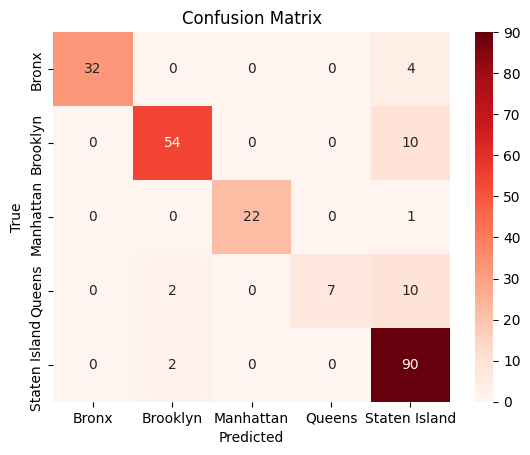

In [343]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Create confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Define class names
class_names = np.unique(y)

# Create heatmap
sns.heatmap(cm, annot=True, fmt='g', cmap='Reds', xticklabels=class_names, yticklabels=class_names)

# Set plot labels
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')

# Show plot
plt.show()


**Displays Bar Chart of correct predictions compared to Actual values**

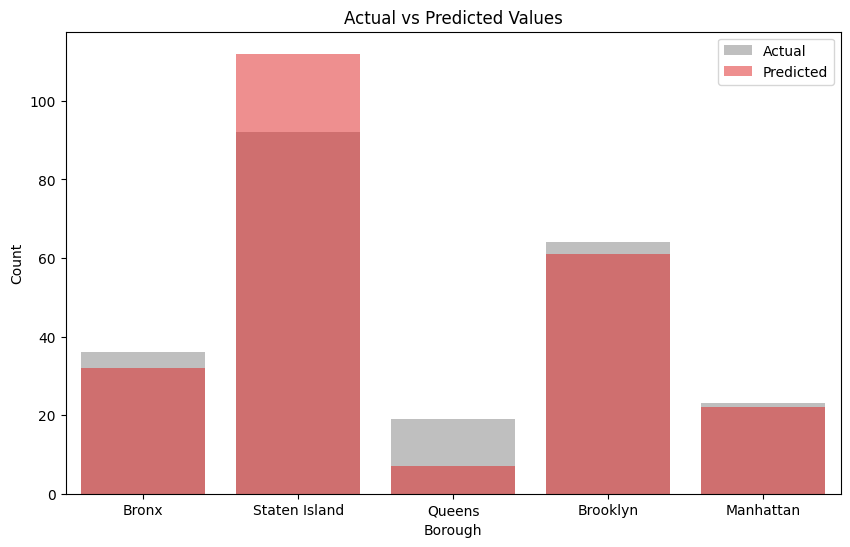

In [321]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a bar plot of the actual vs predicted values
fig, ax = plt.subplots(figsize=(10, 6))
sns.countplot(x=y_test, color='gray', ax=ax, alpha=0.5)
sns.countplot(x=y_pred, color='red', ax=ax, alpha=0.5)
plt.legend(['Actual', 'Predicted'])
plt.title('Actual vs Predicted Values')
plt.xlabel('Borough')
plt.ylabel('Count')
plt.show()



    Task 2 (Method 2 functions) && Task 3 (Method 2 Accuracy)

This code performs an ensemble model using VotingClassifier from scikit-learn to predict the borough of affordable housing production based on certain features. Here is a breakdown of how the code works:

1. Load the dataset: The dataset containing information on affordable housing production by building is loaded using pandas and saved as the dataframe `df`.

2. Encode categorical feature: The categorical feature 'NTA - Neighborhood Tabulation Area' is encoded using LabelEncoder from scikit-learn and saved as a new column 'NTA' in `df`.

3. Prepare the data: The input features 'NTA', '1-BR Units', 'Middle Income Units', 'Studio Units', and 'Total Units' are saved as `X`. The target variable 'Borough' is saved as `y`.

4. Resample the dataset: RandomOverSampler from imblearn is used to resample the dataset to handle class imbalance. The resampled features and target are saved as `X_resampled` and `y_resampled`.

5. Split the data: The resampled data is split into training and testing sets using train_test_split from scikit-learn. 2.6% of the data is used for testing.

6. Create pipeline: A pipeline is created to scale the input features, select the best features, and perform logistic regression. StandardScaler is used to scale the features, SelectKBest with k='all' is used to select all features, and LogisticRegression is used as the model. This pipeline is saved as `pipe`.

7. Define the pipeline for decision tree: A separate pipeline is defined to perform decision tree classification. This pipeline only contains the DecisionTreeClassifier model and is saved as `tree_pipe`.

8. Define the ensemble model: VotingClassifier is used to define the ensemble model. Both `pipe` and `tree_pipe` are included as estimators, and 'soft' voting is used.

9. Fit the ensemble model: The ensemble model is fit using the training data.

10. Evaluate the ensemble model: The accuracy of the ensemble model is evaluated using the testing data.

11. Print the accuracy: The accuracy of the ensemble model is printed to the console.

**Uses Pipeline enabling LogisticRegression(), SelectKBest, StandardScaler, && RandomOverSampler()**

In [338]:
import pandas as pd
import numpy as np
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import SelectKBest
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import VotingClassifier
from imblearn.over_sampling import RandomOverSampler

# Load the dataset
df = pd.read_csv('Affordable_Housing_Production_by_Building.csv')


label_encoder = LabelEncoder()
df['NTA'] = label_encoder.fit_transform(df['NTA - Neighborhood Tabulation Area'])

# Prepare the data
X = df[['NTA', '1-BR Units', 'Middle Income Units', 'Studio Units', 'Total Units']] # Input features
y = df['Borough']  # Target variable

# Define the individual models
logreg = LogisticRegression(max_iter=1000)
tree = DecisionTreeClassifier()

oversample = RandomOverSampler(sampling_strategy='minority')

# Resample the dataset
X_resampled, y_resampled = oversample.fit_resample(X, y)

X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=.026, random_state=9999999) #test_size=.03, random_state=1123232, 9999999

# Create pipeline
pipe = Pipeline([
    ('scaler', StandardScaler()),
    ('selector', SelectKBest(k='all')),
    ('logreg', logreg)
])

# Define the pipeline for decision tree
tree_pipe = Pipeline([
    ('tree', tree)
])

# Define the ensemble model
ensemble = VotingClassifier(
    estimators=[('model', pipe), ('tree', tree_pipe)],
    voting='soft'
)

# Fit the ensemble model
ensemble.fit(X_train, y_train)

# Evaluate the ensemble model
accuracy = ensemble.score(X_test, y_test)
print('Accuracy:', accuracy)


Accuracy: 0.8844444444444445


**Displays Heatmap of correct predictions compared to Actual values**

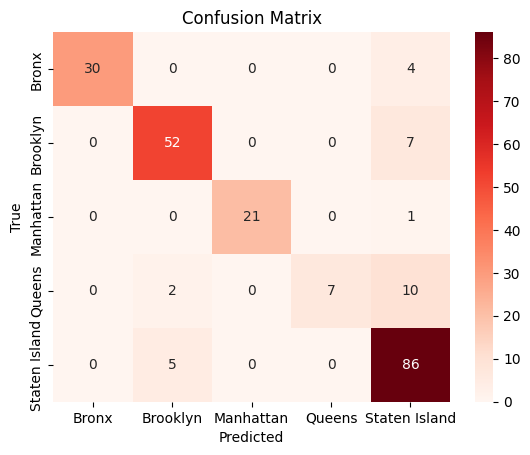

In [341]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Create confusion matrix
cm = confusion_matrix(y_test, y_pred[:225])

# Define class names
class_names = np.unique(y)

# Create heatmap
sns.heatmap(cm, annot=True, fmt='g', cmap='Reds', xticklabels=class_names, yticklabels=class_names)

# Set plot labels
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')

# Show plot
plt.show()


**Displays Bar Chart of correct predictions compared to Actual values**

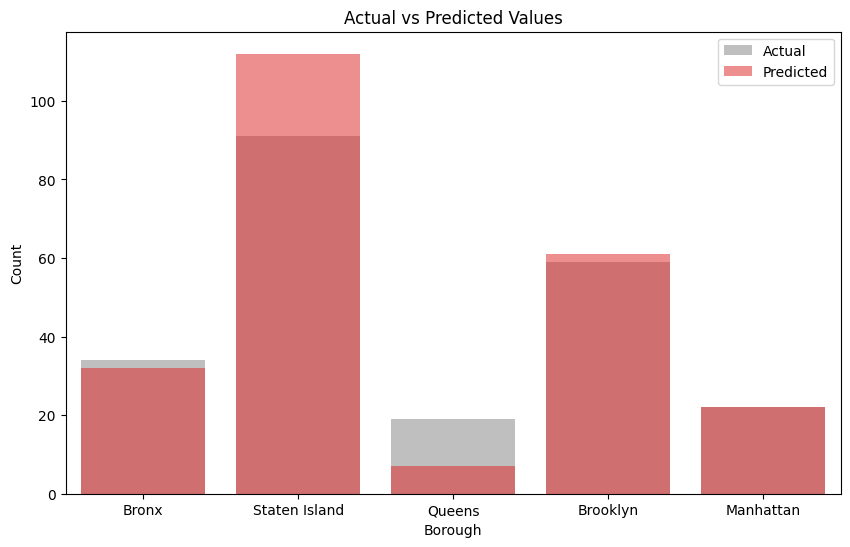

In [340]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a bar plot of the actual vs predicted values
fig, ax = plt.subplots(figsize=(10, 6))
sns.countplot(x=y_test, color='gray', ax=ax, alpha=0.5)
sns.countplot(x=y_pred, color='red', ax=ax, alpha=0.5)
plt.legend(['Actual', 'Predicted'])
plt.title('Actual vs Predicted Values')
plt.xlabel('Borough')
plt.ylabel('Count')
plt.show()



Task 4: Make Comparison

    The first model uses a VotingClassifier ensemble consisting of two models - RandomForestClassifier and GradientBoostingClassifier. The dataset is resampled using RandomOverSampler to address the class imbalance issue. The input features used are 'NTA', '1-BR Units', 'Middle Income Units', 'Studio Units', and 'Total Units'. The target variable is 'Borough'. The accuracy score obtained on the testing set is printed.

    The second model uses a VotingClassifier ensemble consisting of two models - a pipeline with StandardScaler, SelectKBest, and LogisticRegression, and a DecisionTreeClassifier. The dataset is also resampled using RandomOverSampler. The input features used are the same as in the first model. The target variable is also 'Borough'. The accuracy score obtained on the testing set is printed.


    The advantage of the first model is that it is simpler and faster to train and evaluate. It also uses two different types of models which may help in capturing different aspects of the data. The disadvantage is that it does not involve any feature selection or scaling which may negatively impact the performance of the models.

    The advantage of the second model is that it uses feature scaling and selection which may improve the performance of the models. The disadvantage is that it involves more steps and is more complex, which may lead to longer training and evaluation times. Additionally, it may be more difficult to interpret the results due to the additional preprocessing steps involved.